In [55]:
# Importing
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Initializing data
answers = np.array([
    [0.1, 0.1, 0.4, 0.2, 0.2],
    [0.7, 0.4, 0.1, 0.3, 0.2],
    [0.1, 0.3, 0.3, 0.1, 0.3],
    [0.05, 0.1, 0.1, 0.1, 0.1]
])

experts_count = 4
questions_count = 5

In [57]:
# Calculating T-matrices
T_matrices = np.zeros((questions_count,experts_count,experts_count))
min_matr_values = np.array([999999., 999999., 999999., 999999., 999999.])

for q_ind, T in enumerate(T_matrices):
    for j, j_item in enumerate(T):
        for i, i_item in enumerate(T[j]):
            if (i > j):
                diff = abs(answers[i][q_ind] - answers[j][q_ind])
                if ((diff > 0) and (min_matr_values[q_ind] > diff)):
                    min_matr_values[q_ind] = diff
                T[i][j] = diff

print(T_matrices)
print(min_matr_values)

[[[ 0.    0.    0.    0.  ]
  [ 0.6   0.    0.    0.  ]
  [ 0.    0.6   0.    0.  ]
  [ 0.05  0.65  0.05  0.  ]]

 [[ 0.    0.    0.    0.  ]
  [ 0.3   0.    0.    0.  ]
  [ 0.2   0.1   0.    0.  ]
  [ 0.    0.3   0.2   0.  ]]

 [[ 0.    0.    0.    0.  ]
  [ 0.3   0.    0.    0.  ]
  [ 0.1   0.2   0.    0.  ]
  [ 0.3   0.    0.2   0.  ]]

 [[ 0.    0.    0.    0.  ]
  [ 0.1   0.    0.    0.  ]
  [ 0.1   0.2   0.    0.  ]
  [ 0.1   0.2   0.    0.  ]]

 [[ 0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.  ]
  [ 0.1   0.1   0.    0.  ]
  [ 0.1   0.1   0.2   0.  ]]]
[ 0.05  0.1   0.1   0.1   0.1 ]


In [58]:
# Calculating inverted T-matrices

T_inv_matrices = np.zeros((questions_count,experts_count,experts_count))

for q_ind, T in enumerate(T_matrices):
    for j, j_item in enumerate(T):
        for i, i_item in enumerate(T[j]):
            if (i > j):
                T_value = T[i][j]
                if(T_value > 0):
                    T_inv_matrices[q_ind][i][j] = round(1/T_value, 1)
                else:
                    T_inv_matrices[q_ind][i][j] = round(1/min_matr_values[q_ind], 1)
                    
                    
print(T_inv_matrices)

[[[  0.    0.    0.    0. ]
  [  1.7   0.    0.    0. ]
  [ 20.    1.7   0.    0. ]
  [ 20.    1.5  20.    0. ]]

 [[  0.    0.    0.    0. ]
  [  3.3   0.    0.    0. ]
  [  5.   10.    0.    0. ]
  [ 10.    3.3   5.    0. ]]

 [[  0.    0.    0.    0. ]
  [  3.3   0.    0.    0. ]
  [ 10.    5.    0.    0. ]
  [  3.3  10.    5.    0. ]]

 [[  0.    0.    0.    0. ]
  [ 10.    0.    0.    0. ]
  [ 10.    5.    0.    0. ]
  [ 10.    5.   10.    0. ]]

 [[  0.    0.    0.    0. ]
  [ 10.    0.    0.    0. ]
  [ 10.   10.    0.    0. ]
  [ 10.   10.    5.    0. ]]]


In [59]:
# Calculating sum matrix

T_sum_matr = np.zeros((experts_count, experts_count))
T_norm_sum_matr = np.zeros((experts_count, experts_count))

for q in range(0,questions_count):
    T_sum_matr += T_inv_matrices[q]
    
print('Sum T-Matrix:')
print(T_sum_matr)
print('------------------------')
    
# Normalizing sum matrix
total_sum = T_sum_matr.sum()

for i, row in enumerate(T_sum_matr):
    for j, elem in enumerate(row):
        T_norm_sum_matr[i][j] = round(T_sum_matr[i][j] / total_sum, 2)
        
print('Normalized sum T-Matrix:')
print(T_norm_sum_matr)

Sum T-Matrix:
[[  0.    0.    0.    0. ]
 [ 28.3   0.    0.    0. ]
 [ 55.   31.7   0.    0. ]
 [ 53.3  29.8  45.    0. ]]
------------------------
Normalized sum T-Matrix:
[[ 0.    0.    0.    0.  ]
 [ 0.12  0.    0.    0.  ]
 [ 0.23  0.13  0.    0.  ]
 [ 0.22  0.12  0.19  0.  ]]


In [60]:
experts_competitiveness = np.zeros(experts_count)

for exp_ind in range(0, experts_count):
    for i, row in enumerate(T_sum_matr):
            for j, elem in enumerate(row):
                if ((i > j) and (i == exp_ind or j == exp_ind)):
                    experts_competitiveness[exp_ind] += T_norm_sum_matr[i][j]

print('Experts competitiveness:')
print(experts_competitiveness)   
print('----------------------------')

comp_sum = experts_competitiveness.sum()

for exp_ind in range(0, experts_count):
    experts_competitiveness[exp_ind] = round(experts_competitiveness[exp_ind] / comp_sum, 2)

print('Normalized xperts competitiveness:')
print(experts_competitiveness)

Experts competitiveness:
[ 0.57  0.37  0.55  0.53]
----------------------------
Normalized xperts competitiveness:
[ 0.28  0.18  0.27  0.26]


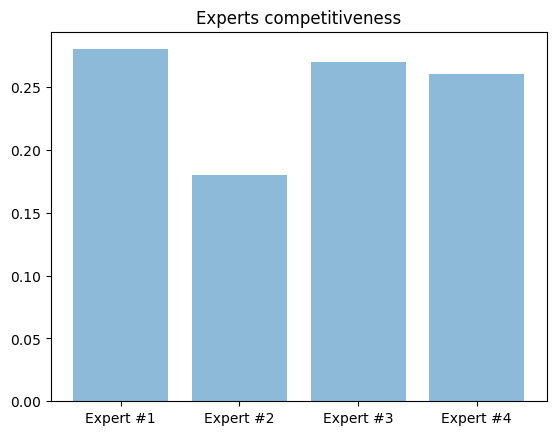

In [61]:
# Printing results

labels = [('Expert #' + str(ind + 1)) for ind in range(0,experts_count)]
y_pos = np.arange(len(labels))

plt.bar(y_pos, experts_competitiveness, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.title('Experts competitiveness')
plt.show()